# Análisis exploratorio - Salarios de DS

En este notebook vamos a trabajar con los datos salariales de Data Scientists a nivel globlal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import plotly.express as px


In [2]:
df= pd.read_csv('data_science_salaries.csv')
df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large


In [3]:
df.columns


Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

In [8]:
espana = df[df['company_location']=="Spain"]


In [9]:
espana

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
534,Machine Learning Engineer,Mid-level,Full-time,Remote,2024,Spain,125800,EUR,139777,Spain,Medium
535,Machine Learning Engineer,Mid-level,Full-time,Remote,2024,Spain,83900,EUR,93222,Spain,Medium
4902,Data Scientist,Senior-level,Full-time,On-site,2023,Spain,60000,EUR,64781,Spain,Medium
4903,Data Scientist,Senior-level,Full-time,On-site,2023,Spain,38000,EUR,41027,Spain,Medium
4904,Data Scientist,Entry-level,Full-time,On-site,2023,Spain,40000,EUR,43187,Spain,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6480,Data Science Consultant,Executive-level,Full-time,Remote,2021,France,59000,EUR,69741,Spain,Small
6481,Data Scientist,Mid-level,Full-time,Remote,2021,Spain,32000,EUR,37825,Spain,Large
6482,Data Scientist,Mid-level,Full-time,Remote,2021,Spain,39600,EUR,46809,Spain,Medium
6583,Data Engineer,Executive-level,Full-time,Hybrid,2020,Spain,70000,EUR,79833,Spain,Large


C:\Users\spide\AppData\Local\Temp\ipykernel_31936\277951278.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


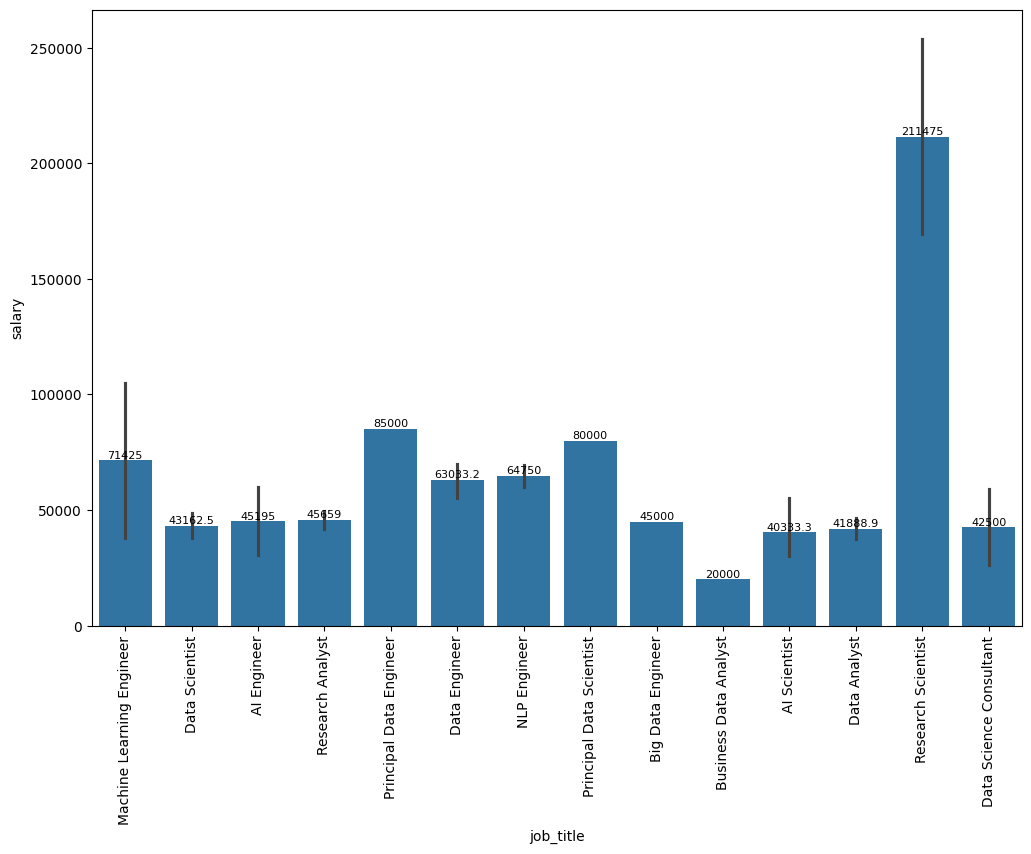

In [12]:
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura
ax = sns.barplot(x='job_title', y='salary', data=espana)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.bar_label(ax.containers[0], fontsize=8)  # Ajusta el tamaño de la fuente de las etiquetas
plt.show()


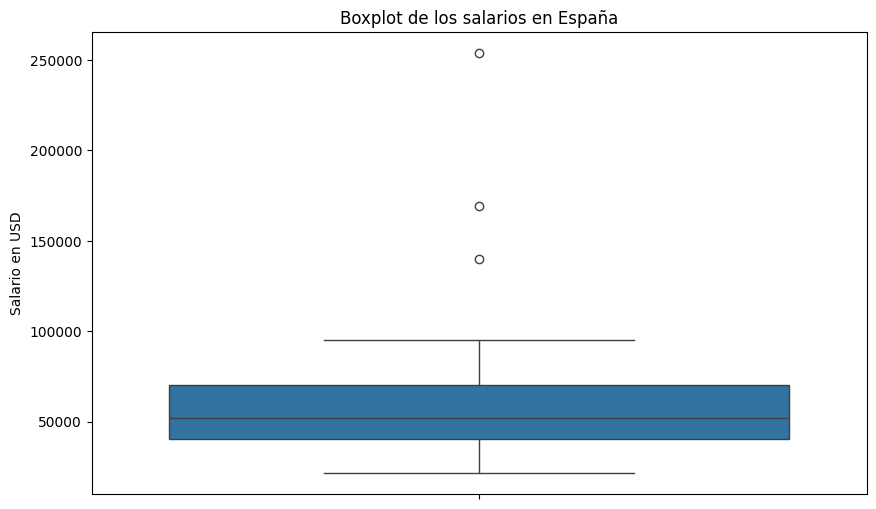

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='salary_in_usd', data=espana)
plt.title('Boxplot de los salarios en España')
plt.ylabel('Salario en USD')

# Añadir etiquetas de datos a los cuartiles
quartiles = espana['salary_in_usd'].quantile([0.25, 0.5, 0.75]).values
for i, q in enumerate(quartiles):
    plt.annotate(f'{q:.0f}', xy=(0, q), xytext=(0.1, q), 
                 textcoords='offset points', ha='center', va='center', 
                 fontsize=10, color='black', backgroundcolor='white')

plt.show()

In [3]:
df_sl_paises = df_salaries.groupby('employee_residence')['work_year'].count().reset_index()
df_sl_paises

,employee_residence,work_year
0,AE,3
1,AM,1
2,AR,6
3,AS,2
4,AT,6
...,...,...
73,TR,5
74,UA,4
75,US,3004
76,UZ,2


In [4]:
#Buscamos repetidos
df_salaries.duplicated().sum()

np.int64(1171)

Vemos que hay muchos duplicados, y que no tiene sentido mantener esos datos. Hay que borrarlos.

In [5]:
aux = df_salaries.copy()
aux['count'] = aux.index
df_duplicates_rank = aux.groupby(list(df_salaries.columns))['count'].count().reset_index()
df_duplicates_rank.sort_values(by="count", ascending=False)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,count
1218,2022,SE,FT,Data Scientist,141525,USD,141525,US,100,US,M,21
1275,2022,SE,FT,Data Scientist,191475,USD,191475,US,100,US,M,21
2217,2023,SE,FT,Data Engineer,252000,USD,252000,US,0,US,M,13
2107,2023,SE,FT,Data Engineer,129000,USD,129000,US,0,US,M,13
998,2022,SE,FT,Data Engineer,130000,USD,130000,US,0,US,M,12
...,...,...,...,...,...,...,...,...,...,...,...,...
19,2020,EN,FT,Research Scientist,42000,USD,42000,NL,50,NL,L,1
20,2020,EN,PT,Data Scientist,19000,EUR,21669,IT,50,IT,S,1
21,2020,EN,PT,ML Engineer,14000,EUR,15966,DE,100,DE,S,1
22,2020,EX,FT,Data Engineer,70000,EUR,79833,ES,50,ES,L,1


Nos quedamos con los datos deduplicados

In [9]:
df_salaries_curated = df_salaries.drop_duplicates()
df_salaries_curated['id'] = 1
df_salaries_curated

C:\Users\Hp\AppData\Local\Temp\ipykernel_2408\2331115276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salaries_curated['id'] = 1


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,id
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,1
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,1
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,1
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,1
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,1
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,1
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,1
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,1


## EDA
Aquí nos haremos preguntas sobre los datos para poder tener un mejor conocimiento de los mismos, y ver cómo orientamos los análisis a realizar. Cada pregunta tiene una celda (Markdown y código asociado).

### ¿En qué país hay más compañías grandes?

In [10]:
df_biggest_companies = df_salaries_curated.groupby(['company_location', 'company_size'])['id'].count().reset_index()
df_biggest_companies = df_biggest_companies[df_biggest_companies['company_size'] == 'L'].sort_values(by='id', ascending=False)
df_biggest_companies
#df_biggest_companies['company_size'] == 'L'

,company_location,company_size,id
129,US,L,220
73,IN,L,37
54,GB,L,20
24,CA,L,18
37,DE,L,16
51,FR,L,10
98,NL,L,10
12,AU,L,8
46,ES,L,6
108,PT,L,5


### Tipo de trabajo, país de residencia en el que más se cobra?

In [8]:
df_res_co_job_best_salaries = (df_salaries_curated.groupby(['employee_residence', 'job_title'])['salary_in_usd']
                                                  .mean()
                                                  .reset_index())
df_res_co_job_best_salaries = df_res_co_job_best_salaries.sort_values(by=['job_title', 'salary_in_usd'], ascending=False)
df_res_co_job_best_salaries

,employee_residence,job_title,salary_in_usd
376,US,Staff Data Scientist,105000.0
241,NG,Staff Data Analyst,15000.0
293,SG,Software Data Engineer,75020.0
240,NG,Software Data Engineer,50000.0
110,ES,Research Scientist,211475.0
...,...,...,...
227,MK,AI Developer,6304.0
307,US,3D Computer Vision Researcher,50000.0
8,AS,3D Computer Vision Researcher,20000.0
40,CA,3D Computer Vision Researcher,10000.0


### Cuánto se cobra de media por cada nivel de experiencia?

In [9]:
df_avg_salary_experience = (df_salaries_curated.groupby(['experience_level', 'employment_type'])['salary_in_usd']
                                               .mean()
                                               .reset_index()
)
df_avg_salary_experience = df_avg_salary_experience.sort_values(by=['employment_type', 'experience_level'], ascending=False)
df_avg_salary_experience

,experience_level,employment_type,salary_in_usd
9,MI,PT,42561.000000
3,EN,PT,38885.000000
12,SE,FT,154165.019367
8,MI,FT,102742.781874
5,EX,FT,188710.610526
2,EN,FT,74564.626984
11,SE,FL,53333.333333
7,MI,FL,41615.600000
1,EN,FL,75000.000000
10,SE,CT,97500.000000


### En qué tamaño de compañía se cobra más?

In [12]:
df_company_size_salaries = (df_salaries_curated.groupby(by=['company_location', 'company_size'])['salary_in_usd']
                                               .mean()
                                               .reset_index()
)
df_company_size_salaries.sort_values(by=['company_location', '', ascending=False)

,company_location,company_size,salary_in_usd
0,AE,L,115000.000000
1,AE,S,92500.000000
2,AL,S,10000.000000
3,AM,S,50000.000000
4,AR,L,31000.000000
...,...,...,...
128,UA,S,50000.000000
129,US,L,151464.422727
130,US,M,153984.837560
131,US,S,105847.339623


### Por qué % promedio se incrementa el salario entre niveles de experiencia?

### En qué país se cobra más por tipo de empleo?

In [17]:
df_jobtype_country_best_salary = (df_salaries_curated.groupby(by=['company_location', 'job_title'])['salary_in_usd']
                                                     .mean()
                                                     .reset_index()
)
df_jobtype_country_best_salary.sort_values(by=['job_title', 'salary_in_usd'], ascending=False)

,company_location,job_title,salary_in_usd
354,US,Staff Data Scientist,105000.0
63,CA,Staff Data Analyst,15000.0
272,SG,Software Data Engineer,75020.0
24,AU,Software Data Engineer,50000.0
114,ES,Research Scientist,211475.0
...,...,...,...
220,MK,AI Developer,6304.0
73,CR,3D Computer Vision Researcher,50000.0
7,AS,3D Computer Vision Researcher,20000.0
2,AL,3D Computer Vision Researcher,10000.0


### En qué nivel de expriencia hay más empleados?

In [11]:
df_exp_lvl_employees = (df_salaries_curated.groupby(by=['experience_level'])
                                           .agg({'id': 'count'}).rename(columns={'id': 'total'})
                                           .sort_values(by='total', ascending=False)
                                           .reset_index()
)
df_exp_lvl_employees

,experience_level,total
0,SE,1554
1,MI,664
2,EN,270
3,EX,96
